<a href="https://colab.research.google.com/github/Denismcolin/Denismcolin/blob/main/Deep%20Learning%20-%20Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]])


550378/550378 [==============================] - 0s 0us/step


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  for j in sequence:
    results[i, j] = 1.
 return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
 results = np.zeros((len(labels), dimension))
 for i, label in enumerate(labels):
  results[i, label] = 1.
 return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

In [17]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [19]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [20]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 6s 47ms/step - loss: 2.6338 - accuracy: 0.5117 - val_loss: 1.7756 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.4989 - accuracy: 0.6927 - val_loss: 1.3777 - val_accuracy: 0.6860
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1676 - accuracy: 0.7437 - val_loss: 1.2107 - val_accuracy: 0.7150
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9635 - accuracy: 0.7858 - val_loss: 1.1001 - val_accuracy: 0.7610
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8031 - accuracy: 0.8245 - val_loss: 1.0188 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6740 - accuracy: 0.8582 - val_loss: 0.9583 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5618 - accuracy: 0.8847 - val_loss: 0.9351 - val_accuracy: 0.7920
Epoch 8/20
16

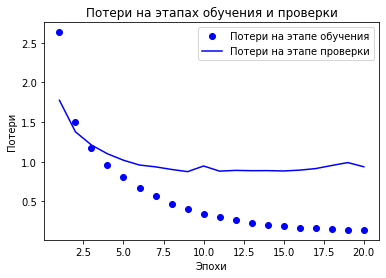

In [22]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()

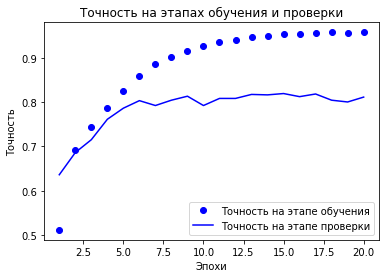

In [23]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_acc, "b", label="Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Точность")
plt.legend()
plt.show()

In [24]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])
model.fit(x_train,
 y_train,
 epochs=9,
 batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.5129 - accuracy: 0.5112
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.4125 - accuracy: 0.6925
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.0958 - accuracy: 0.7557
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.8949 - accuracy: 0.8052
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7356 - accuracy: 0.8378
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6073 - accuracy: 0.8668
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.5008 - accuracy: 0.8931
Epoch 8/9
18/18 [==============================] - 0s 15ms/step - loss: 0.4186 - accuracy: 0.9089
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.8978 - accuracy: 0.7930


In [25]:
results

[0.8978350162506104, 0.792965292930603]

In [26]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18967052537845058

In [27]:
predictions = model.predict(x_test)


71/71 [==============================] - 1s 5ms/step


In [28]:
predictions[0].shape

(46,)

In [29]:
 np.sum(predictions[0])

1.0000001

In [30]:
np.argmax(predictions[0])

3

In [31]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(4, activation="relu"),
 layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])
model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=128,
 validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 12ms/step - loss: 3.0302 - accuracy: 0.3315 - val_loss: 2.3964 - val_accuracy: 0.4050
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.9790 - accuracy: 0.5803 - val_loss: 1.7468 - val_accuracy: 0.6080
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.5353 - accuracy: 0.6393 - val_loss: 1.5407 - val_accuracy: 0.6240
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3607 - accuracy: 0.6530 - val_loss: 1.4638 - val_accuracy: 0.6140
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2550 - accuracy: 0.6616 - val_loss: 1.4191 - val_accuracy: 0.6370
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1743 - accuracy: 0.6972 - val_loss: 1.3936 - val_accuracy: 0.6640
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1077 - accuracy: 0.7157 - val_loss: 1.3944 - val_accuracy: 0.6620
Epoch 8/20
63/63 [=